In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
df.drop(['who', 'adult_male','class', 'deck', 'embark_town','alive'],axis = 1, inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [10]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [11]:
df.dropna(subset=['embarked'], inplace=True)

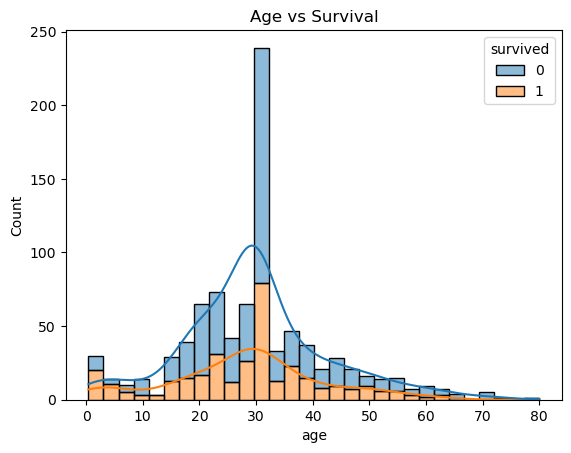

In [12]:
sns.histplot(data=df, x='age', hue='survived', kde=True, multiple='stack')
plt.title('Age vs Survival')
plt.show()

<Axes: xlabel='age', ylabel='fare'>

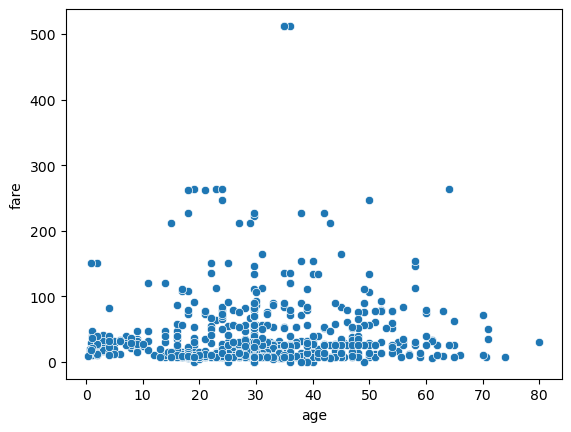

In [13]:
sns.scatterplot(data=df, x='age', y='fare')

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])


In [20]:
df = df.astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


In [21]:
X = df.drop(['survived'], axis = 1)
y = df['survived']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20, random_state = 42)

LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [26]:
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
cr = classification_report(y_test, pred)

print("=== Model Evaluation Metrics ===")
print(f"Accuracy Score: {acc:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

=== Model Evaluation Metrics ===
Accuracy Score: 0.803
F1 Score: 0.752

Confusion Matrix:
[[90 19]
 [16 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
numerical_cols = X_train[['age', 'fare', 'sibsp', 'parch','pclass','sex','embarked','alone']]
numerical_cols1 = X_test[['age', 'fare', 'sibsp', 'parch','pclass','sex','embarked','alone']]
X_train_scaled = scalar.fit_transform(numerical_cols)
X_test_scaled = scalar.fit_transform(numerical_cols1)

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


KNeighborsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [30]:
knn_predict = knn.predict(X_test_scaled)

In [31]:
cm = confusion_matrix(y_test, knn_predict)
acc = accuracy_score(y_test, knn_predict)
f1 = f1_score(y_test, knn_predict)
cr = classification_report(y_test, knn_predict)

print("=== Model Evaluation Metrics ===")
print(f"Accuracy Score: {acc:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

=== Model Evaluation Metrics ===
Accuracy Score: 0.798
F1 Score: 0.743

Confusion Matrix:
[[90 19]
 [17 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       109
           1       0.73      0.75      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [33]:
nbpredict = nb.predict(X_test)

In [34]:
cm = confusion_matrix(y_test, nbpredict)
acc = accuracy_score(y_test, nbpredict)
f1 = f1_score(y_test, nbpredict)
cr = classification_report(y_test, nbpredict)

print("=== Model Evaluation Metrics ===")
print(f"Accuracy Score: {acc:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

=== Model Evaluation Metrics ===
Accuracy Score: 0.775
F1 Score: 0.730

Confusion Matrix:
[[84 25]
 [15 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
dt_predict = dt.predict(X_test)

In [37]:
cm = confusion_matrix(y_test, dt_predict)
acc = accuracy_score(y_test, dt_predict)
f1 = f1_score(y_test, dt_predict)
cr = classification_report(y_test, dt_predict)

print("=== Model Evaluation Metrics ===")
print(f"Accuracy Score: {acc:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

=== Model Evaluation Metrics ===
Accuracy Score: 0.803
F1 Score: 0.755

Confusion Matrix:
[[89 20]
 [15 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



SVM

In [48]:
from sklearn.svm import SVC
model_svc = SVC( kernel='rbf')
model_svc.fit(X_train_scaled,y_train)


SVC()

In [49]:
svc_predict = model_svc.predict(X_test_scaled)

In [40]:
cm = confusion_matrix(y_test, svc_predict)
acc = accuracy_score(y_test, svc_predict)
f1 = f1_score(y_test, svc_predict)
cr = classification_report(y_test, svc_predict)

print("=== Model Evaluation Metrics ===")
print(f"Accuracy Score: {acc:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

=== Model Evaluation Metrics ===
Accuracy Score: 0.826
F1 Score: 0.767

Confusion Matrix:
[[96 13]
 [18 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.80      0.74      0.77        69

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178



TEST